:**Image Classification with Convolutional Neural Network(CNN)**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

df = datasets.cifar10.load_data()

# X_train.shape
#df


In [ ]:
X_test.shape

(10000, 32, 32, 3)

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[9]

'truck'

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

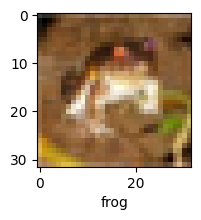

In [ ]:
plot_sample(X_train,y_train,0)

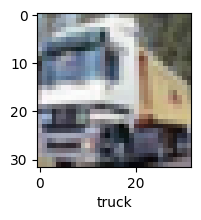

In [ ]:
plot_sample(X_train,y_train,1)

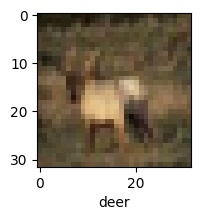

In [ ]:
plot_sample(X_train,y_train,3)

In [ ]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])
ann.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.8129 - accuracy: 0.3543
Epoch 2/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.6230 - accuracy: 0.4283
Epoch 3/5
1563/1563 [==============================] - 167s 107ms/step - loss: 1.5385 - accuracy: 0.4584
Epoch 4/5
1563/1563 [==============================] - 156s 100ms/step - loss: 1.4797 - accuracy: 0.4789
Epoch 5/5
1563/1563 [==============================] - 161s 103ms/step - loss: 1.4298 - accuracy: 0.4973


In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 10s 32ms/step - loss: 1.4661 - accuracy: 0.4814


[1.4660755395889282, 0.4814000129699707]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.59      0.53      1000
           1       0.70      0.50      0.58      1000
           2       0.45      0.26      0.33      1000
           3       0.40      0.20      0.26      1000
           4       0.39      0.50      0.44      1000
           5       0.44      0.28      0.34      1000
           6       0.51      0.58      0.55      1000
           7       0.45      0.66      0.54      1000
           8       0.45      0.76      0.57      1000
           9       0.59      0.48      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



In [ ]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 89s 53ms/step - loss: 1.5142 - accuracy: 0.4535
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1369 - accuracy: 0.6017
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9978 - accuracy: 0.6529
Epoch 4/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9110 - accuracy: 0.6836
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8455 - accuracy: 0.7073
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7925 - accuracy: 0.7242
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7442 - accuracy: 0.7398
Epoch 8/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7022 - accuracy: 0.7576
Epoch 9/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.6656 - accuracy: 0.7690
Epoch 10/10
1563/1563 [==============================] - 72s 46m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 8s 26ms/step - loss: 0.9132 - accuracy: 0.7002


[0.9132318496704102, 0.7002000212669373]

In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

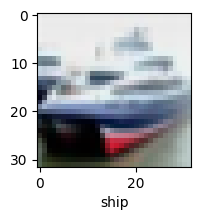

In [ ]:
plot_sample(X_test,y_test,1)

In [ ]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 16ms/step


array([[1.0293286e-05, 2.6703490e-05, 8.4700994e-05, 9.5484895e-01,
        7.4731826e-05, 1.6260102e-02, 2.8368961e-02, 4.1345625e-06,
        1.7033746e-04, 1.5116096e-04],
       [5.3946842e-02, 3.0166844e-02, 2.2923612e-05, 1.4316495e-06,
        4.7642752e-06, 1.1147799e-07, 1.7461955e-06, 9.4215586e-08,
        9.1409212e-01, 1.7630705e-03],
       [2.3489006e-01, 4.8618272e-01, 1.7836669e-02, 6.1728597e-02,
        3.3547420e-03, 4.1663172e-03, 7.0892470e-03, 3.4191799e-03,
        1.3041109e-01, 5.0921489e-02],
       [9.6206039e-01, 1.9528786e-02, 7.8688655e-04, 3.2896231e-04,
        7.9925612e-06, 1.8336209e-06, 8.8506087e-05, 1.3498964e-06,
        1.7193470e-02, 1.8152060e-06],
       [2.1334250e-08, 1.3073496e-04, 6.7081256e-04, 3.0407630e-04,
        3.7970573e-03, 9.3392637e-06, 9.9507821e-01, 1.1475296e-08,
        7.9624879e-06, 1.8207666e-06]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

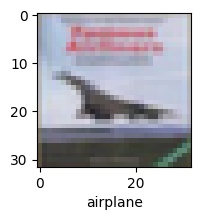

In [ ]:
plot_sample(X_test,y_test,3)

In [ ]:
classes[y_classes[0]]

'cat'

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.69      0.74      1000
           1       0.82      0.80      0.81      1000
           2       0.61      0.60      0.60      1000
           3       0.55      0.50      0.52      1000
           4       0.66      0.63      0.65      1000
           5       0.64      0.58      0.61      1000
           6       0.63      0.87      0.73      1000
           7       0.78      0.70      0.74      1000
           8       0.87      0.77      0.82      1000
           9       0.70      0.86      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

